# The Oscillatory Neurocomputer model based on the Kuramoto's model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 1, 1), (0, 0, 0)]  # (white, black)
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

In [2]:
plt.style.use('seaborn-v0_8-talk')
# plt.style.use('grayscale')
# plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
class OscillatoryNeurocomputer:
    
    def __init__(self, dim1=10, dim2=6, M=3, dt=0.01, T=20):
        self.dim1 = dim1
        self.dim2 = dim2
        self.N = int(dim1*dim2) # number of neurons
        self.M = M # number of patterns to remember
        self.dt = dt
        self.T = T
        
        # patterns for recognition
        self.patterns = np.zeros((self.N, self.M))
        self.patterns[:,0] = np.array([-1, 1, 1, 1, 1, -1, # digit 0
                                       -1, 1, 1, 1, 1, -1,
                                       1, 1, -1, -1, 1, 1,
                                       1, 1, -1, -1, 1, 1,
                                       1, -1, -1, -1, -1, 1,
                                       1, -1, -1, -1, -1, 1,
                                       1, 1, -1, -1, 1, 1,
                                       1, 1, -1, -1, 1, 1,
                                       -1, 1, 1, 1, 1, -1,
                                       -1, 1, 1, 1, 1, -1])
        self.patterns[:,1] = np.array([-1, -1, 1, 1, -1, -1, # digit 1
                                       -1, 1, 1, 1, -1, -1,
                                       1, 1, 1, 1, -1, -1,
                                       -1, -1, 1, 1, -1, -1,
                                       -1, -1, 1, 1, -1, -1,
                                       -1, -1, 1, 1, -1, -1,
                                       -1, -1, 1, 1, -1, -1,
                                       -1, -1, 1, 1, -1, -1,
                                       -1, -1, 1, 1, -1, -1,
                                       1, 1, 1, 1, 1, 1])
        self.patterns[:,2] = np.array([-1, 1, 1, 1, 1, -1, # digit 2
                                       1, 1, 1, 1, 1, 1,
                                       1, 1, -1, -1, 1, 1,
                                       -1, -1, -1, -1, 1, 1, 
                                       -1, -1, -1, -1, 1, 1,
                                       -1, -1, -1, 1, 1, -1,
                                       -1, -1, 1, 1, -1, -1,
                                       -1, 1, 1, -1, -1, -1,
                                       1, 1, 1, 1, 1, 1,
                                       1, 1, 1, 1, 1, 1])

        # pattern to be recognized
        self.input = np.array([1, -1, 1, 1, -1, -1,
                               -1, 1, 1, 1, 1, -1,
                               -1, 1, 1, 1, -1, 1,
                               -1, -1, -1, 1, -1, -1,
                               -1, -1, 1, 1, -1, -1,
                               -1, -1, 1, -1, -1, -1,
                               -1, -1, 1, 1, -1, -1,
                               -1, -1, -1, 1, -1, -1,
                               -1, -1, 1, 1, -1, -1,
                               1, -1, 1, 1, 1, 1])
        

    def initialize(self):
        print("***** INITIALIZATION OF THE NETWORK *****")
        self.network = np.random.rand(self.N, 1)*2*np.pi # random
        print(f"initialization t= {0}")
        # self.show(self.network[:,-1])
        # self.show_phase(t=0)
        for n in range(int(self.T/self.dt)):
            new_phase = np.zeros((self.N, 1))
            for i in range(self.N):
                new_phase[i,0] = self.network[i,-1] + (self.dt/self.N)*np.sum(self.input[i]*self.input[:]*np.sin(self.network[:,-1] - self.network[i,-1]))
            new_phase = new_phase % (2*np.pi)
            self.network = np.concatenate((self.network, new_phase), axis=1)
            # self.show_phase(t=n)  
            if ((n+1)*self.dt) % 2.5 == 0:
                print(f"initialization t= {(n+1)*self.dt}")
                # self.show(self.network[:,-1])
                # self.show_phase(t=n)
        self.phase_plot()

    def recognize(self):
        print("***** PATTERN RECOGNITION *****")
        self.network = (np.copy(self.network[:,-1]) + np.random.randn(self.N)/3).reshape(self.N, 1)
        print(f"recognition t= {0}")
        self.show(self.network[:])
        self.show_phase(t=0) 
        for n in range(int(self.T/self.dt)):
            new_phase = np.zeros((self.N, 1))
            for i in range(self.N):
                s = 0
                for k in range(self.M):
                    s += np.sum(self.patterns[i,k]*self.patterns[:,k]*np.sin(self.network[:,-1] - self.network[i,-1]))
                new_phase[i,0] = self.network[i,-1] + (self.dt/self.N)*s
            new_phase = new_phase % (2*np.pi)
            self.network = np.concatenate((self.network, new_phase), axis=1)
            # self.show_phase(t=n)  
            if ((n+1)*self.dt) % 2.5 == 0:
                print(f"recognition t= {(n+1)*self.dt}")
                self.show(self.network[:,-1])
                self.show_phase(t=n) 
        print(f"final solution")
        self.show(self.transform(self.network[:,-1]))
        self.phase_plot()
        

    def simulation(self, T=10):
        print("***** THE OSCILLATORY MODEL SIMULATION *****")
        print(f"The input pattern")
        self.show(self.input)
        self.initialize()
        self.recognize()
        

    def show_phase(self, t=0):
        plt.plot(np.cos(np.arange(0, 2*np.pi+0.01, 0.01)), np.sin(np.arange(0, 2*np.pi+0.01, 0.01)), color="black", alpha=0.8)
        for i in range(self.N):
            plt.scatter(np.cos(self.network[i,t]), np.sin(self.network[i,t]))
            plt.xlim((-1,1))
            plt.ylim((-1,1))

        plt.axis("equal")
        plt.show()

    def phase_plot(self):
        for i in range(self.N):
            plt.plot(self.network[i,:])
        plt.xlabel(r'$t$')
        plt.ylabel(r'$\varphi_i(t)$')
        plt.show()


    def transform(self, X):
        return np.cos(X)
        
    def show(self, X):
        plt.imshow(X.reshape(self.dim1, self.dim2), cmap=custom_cmap)
        # Remove xticks and yticks
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        plt.show()

    def show_patterns(self):
        print("***** MEMORIZED PATTERNS *****")
        for j in range(self.M):
            print(f"pattern {j}")
            self.show(self.patterns[:,j])
        

***** MEMORIZED PATTERNS *****
pattern 0


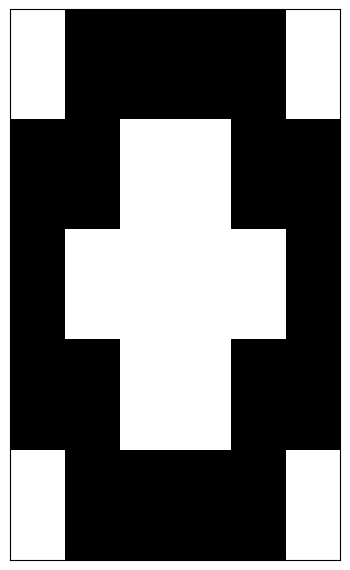

pattern 1


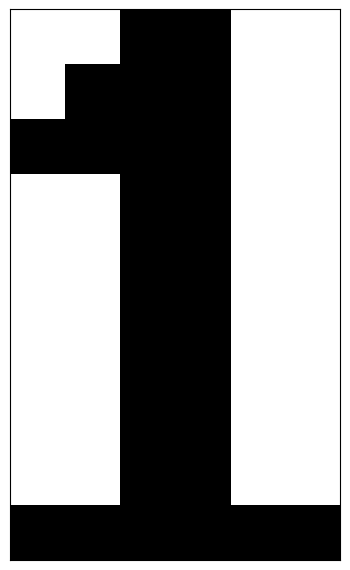

pattern 2


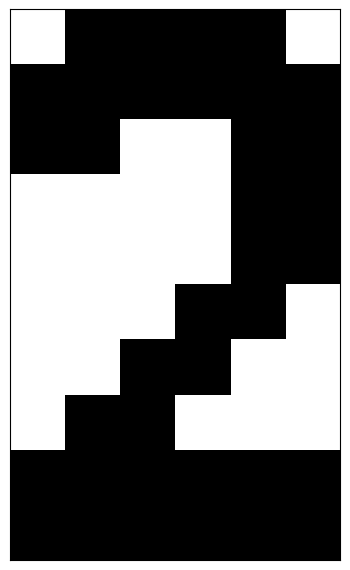

***** THE OSCILLATORY MODEL SIMULATION *****
The input pattern


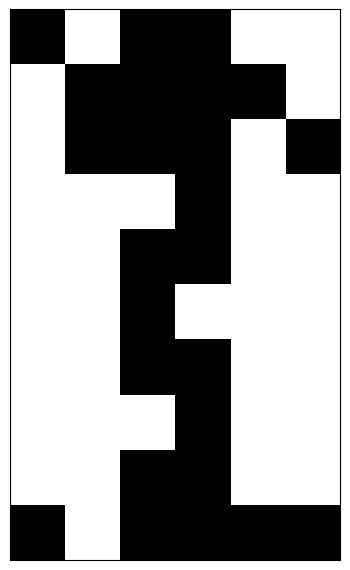

***** INITIALIZATION OF THE NETWORK *****
initialization t= 0
initialization t= 2.5
initialization t= 5.0
initialization t= 7.5
initialization t= 10.0
initialization t= 12.5
initialization t= 15.0
initialization t= 17.5
initialization t= 20.0


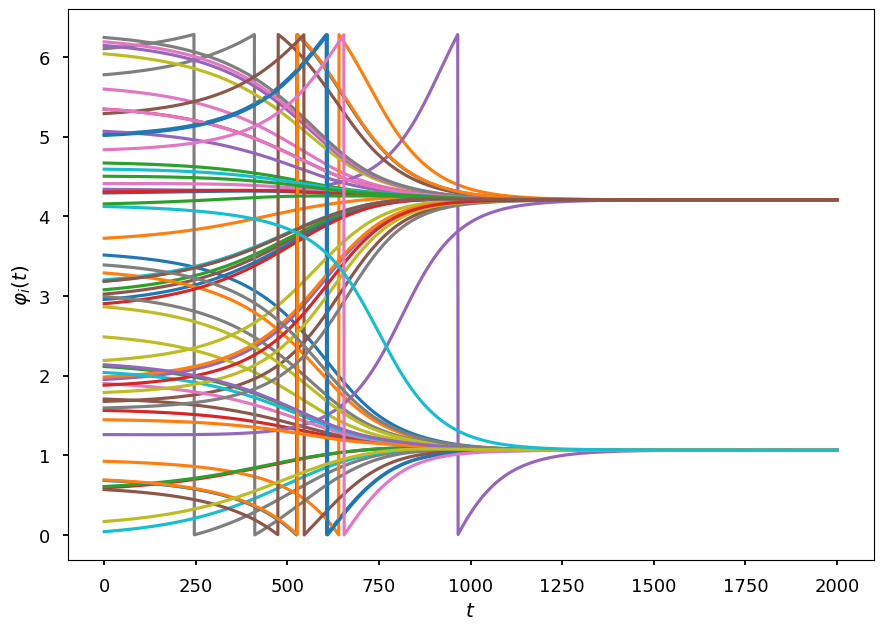

***** PATTERN RECOGNITION *****
recognition t= 0


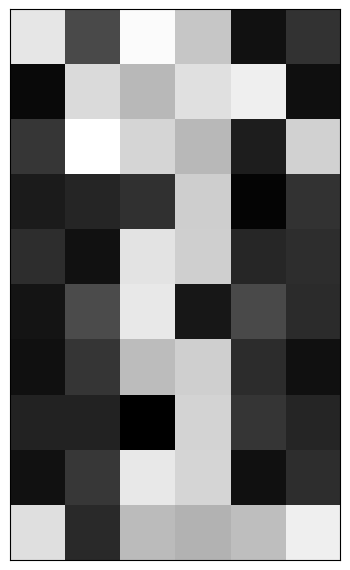

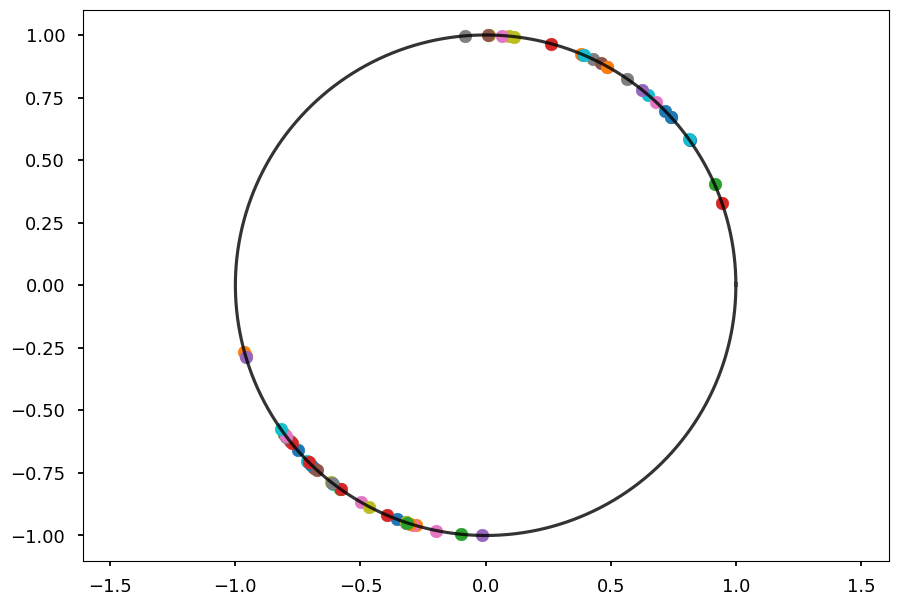

recognition t= 2.5


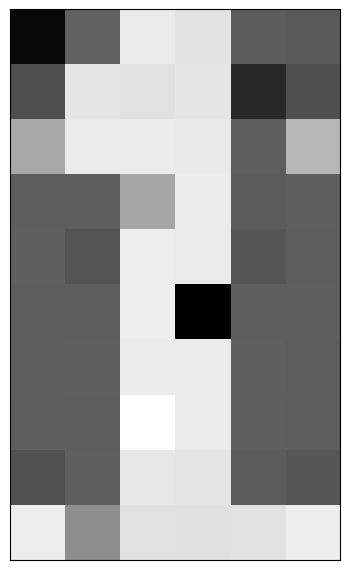

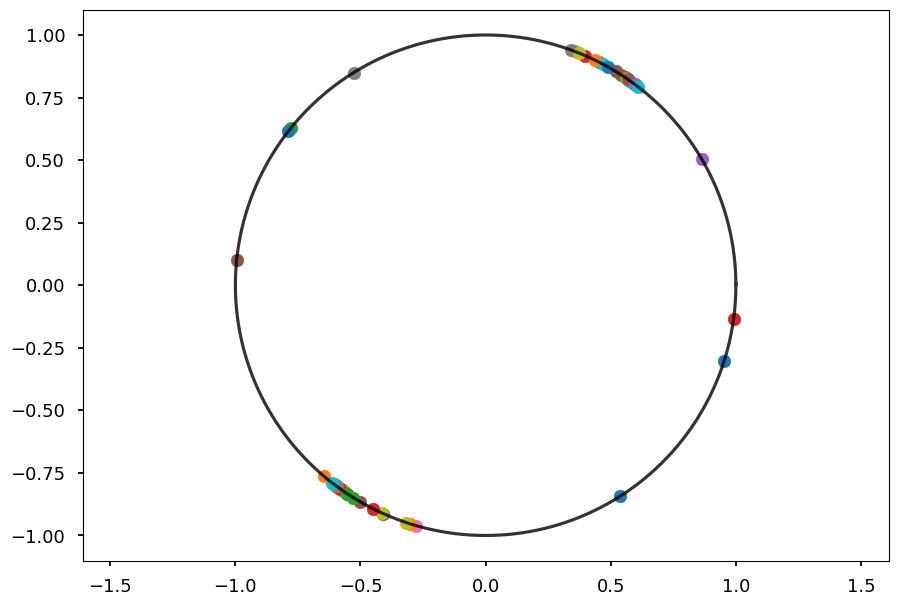

recognition t= 5.0


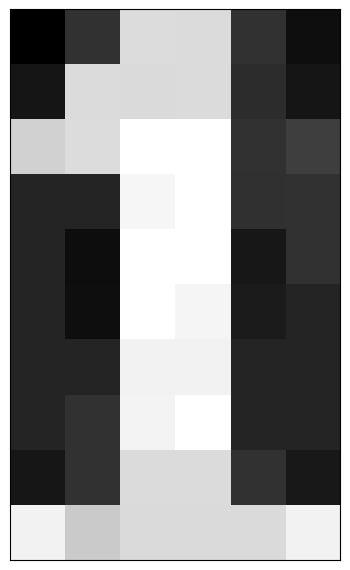

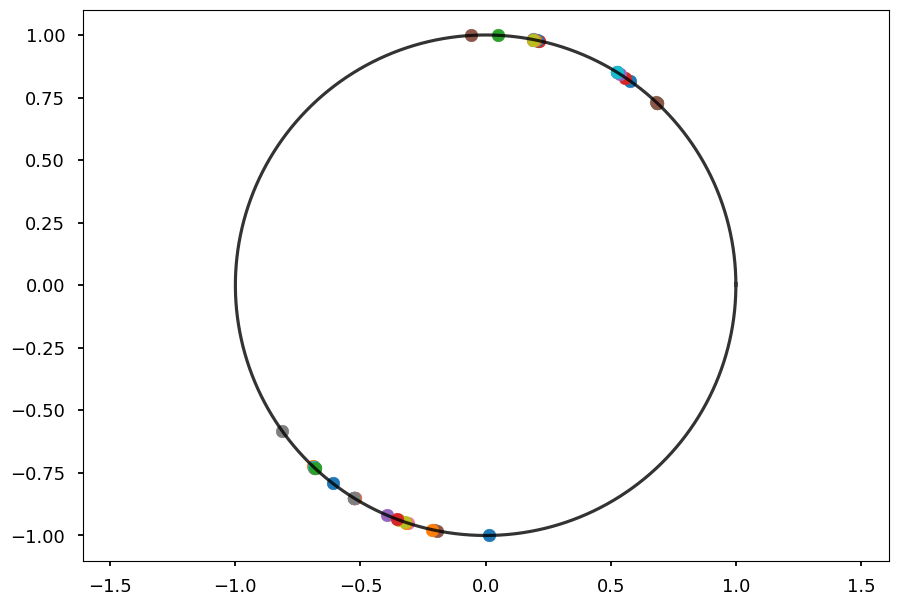

recognition t= 7.5


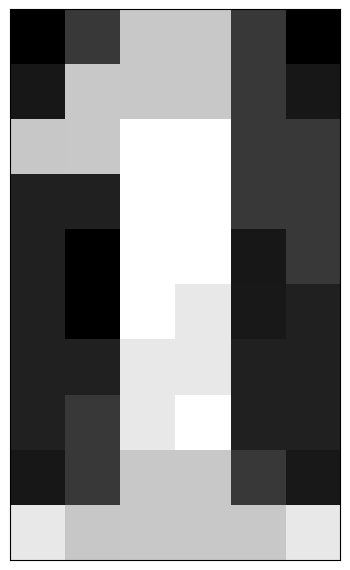

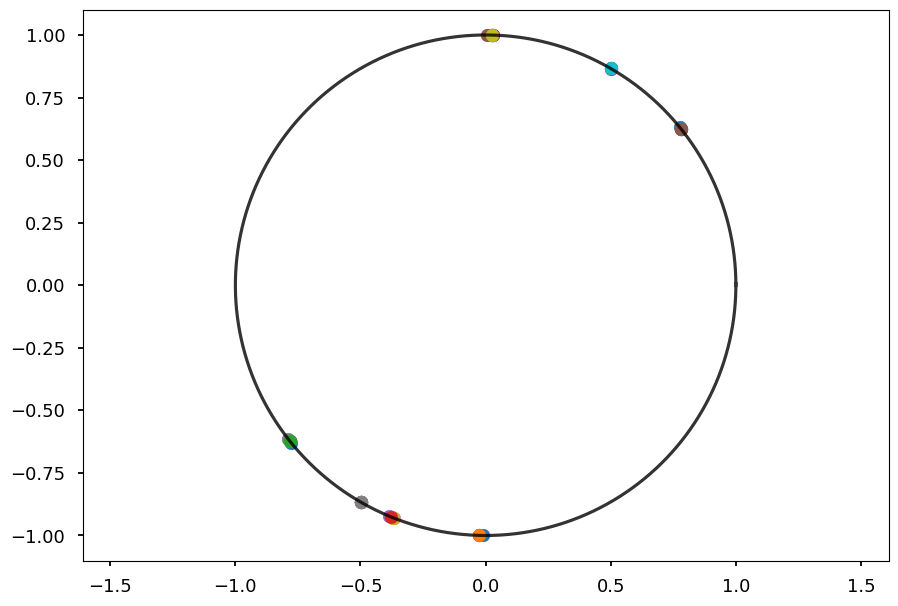

recognition t= 10.0


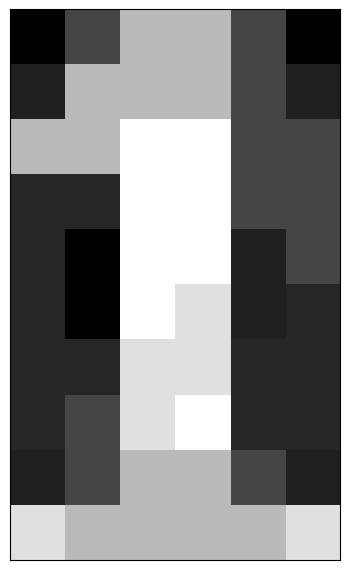

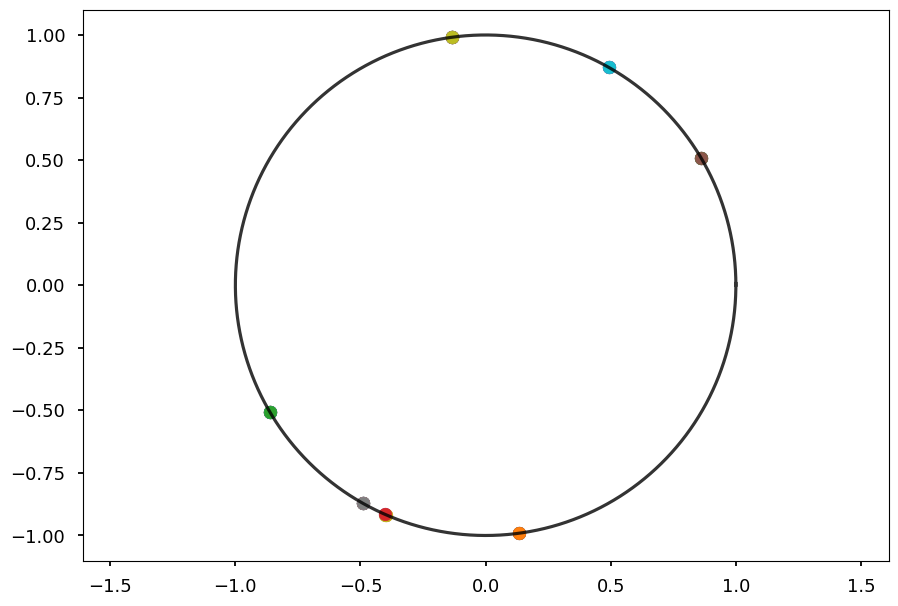

recognition t= 12.5


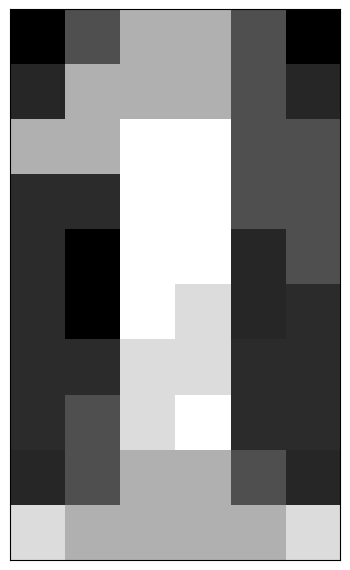

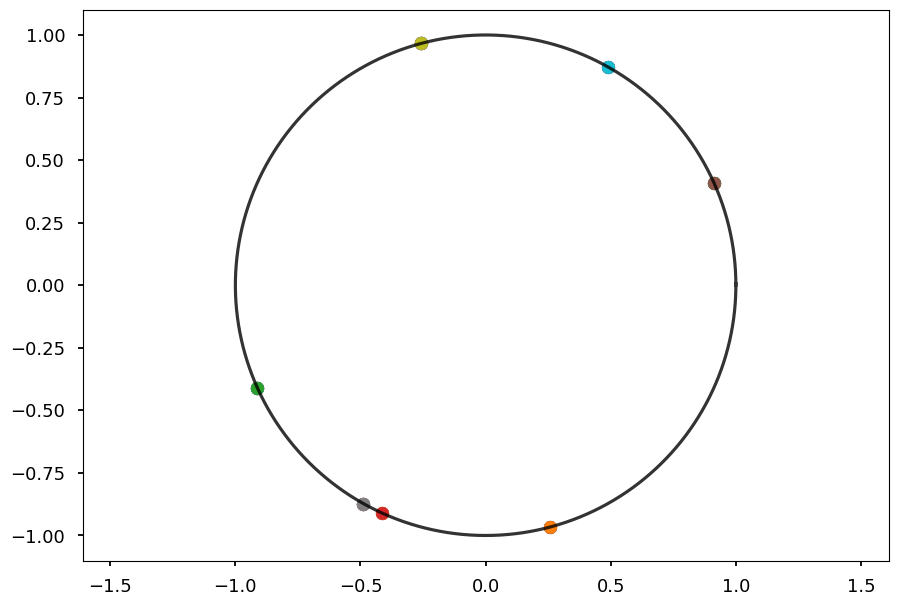

recognition t= 15.0


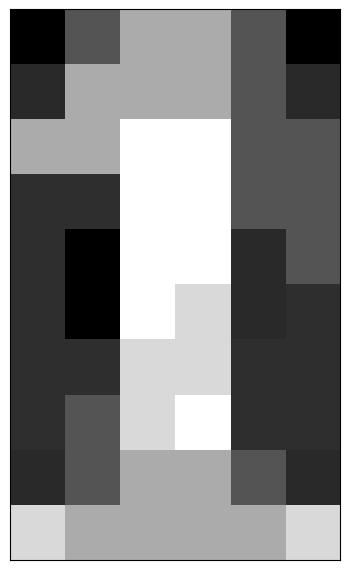

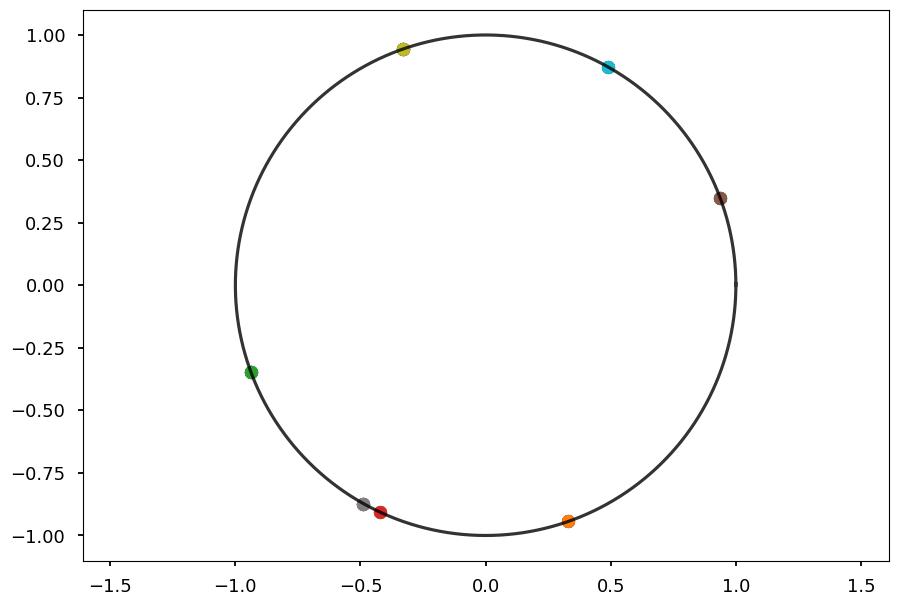

recognition t= 17.5


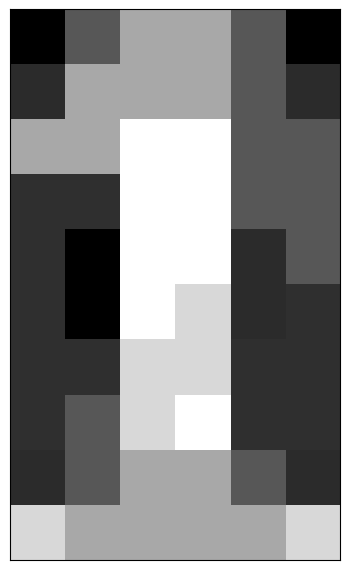

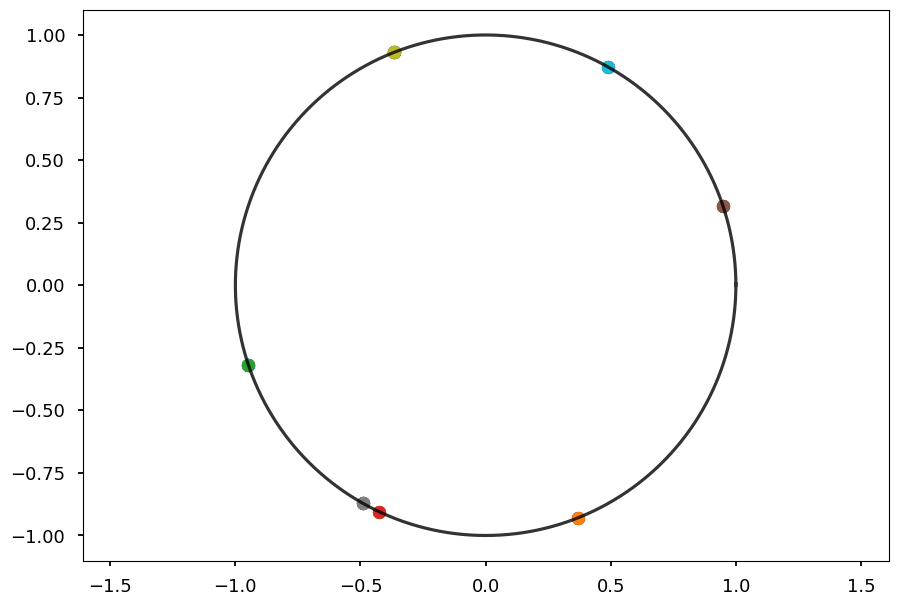

recognition t= 20.0


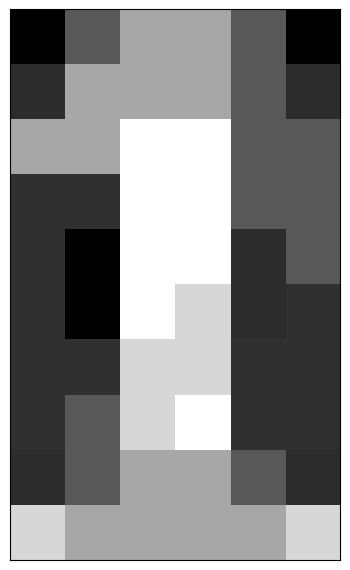

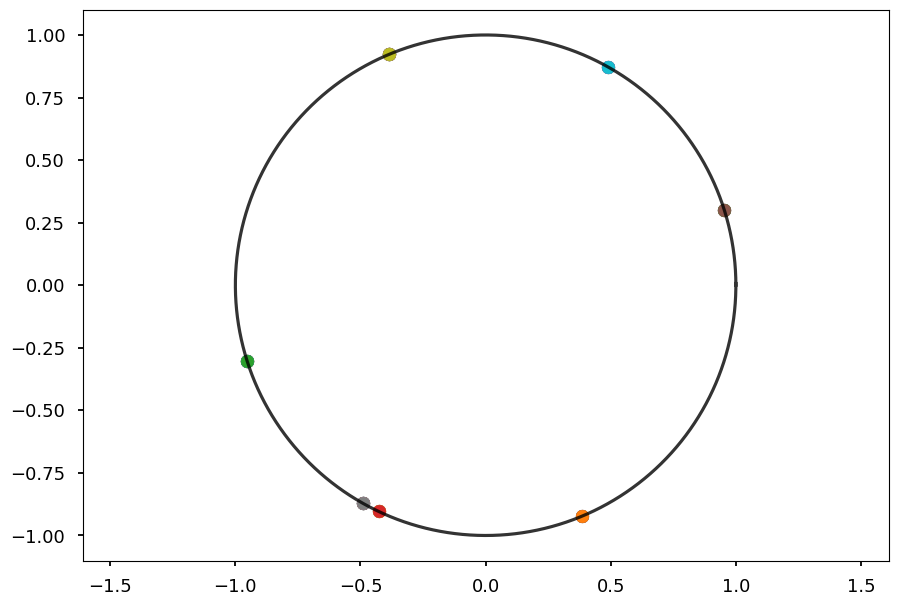

final solution


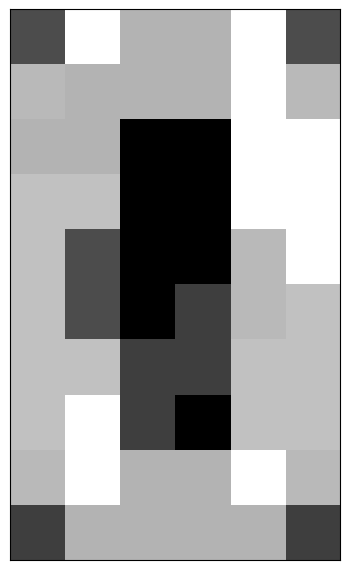

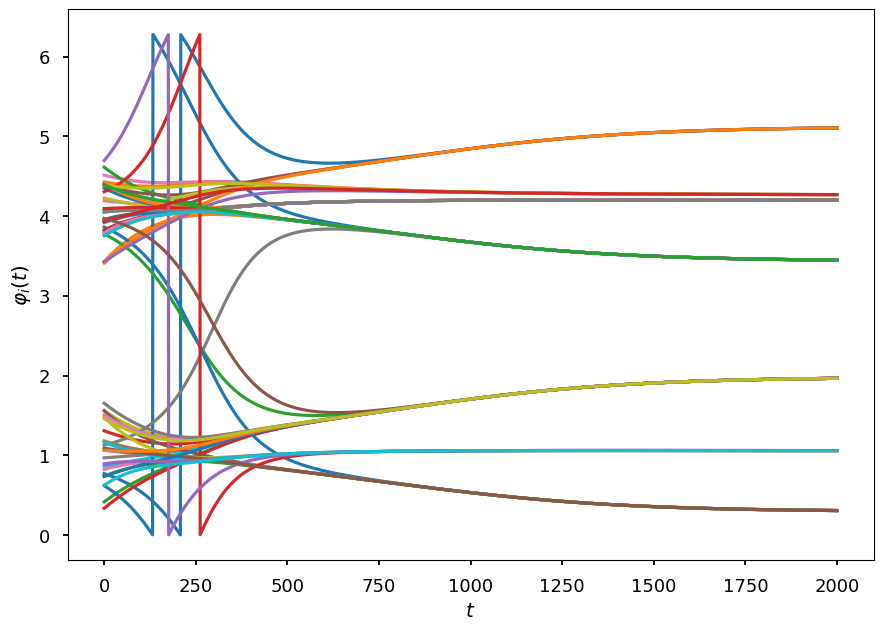

In [14]:
model = OscillatoryNeurocomputer()
model.show_patterns()
model.simulation()

***** MEMORIZED PATTERNS *****
pattern 0


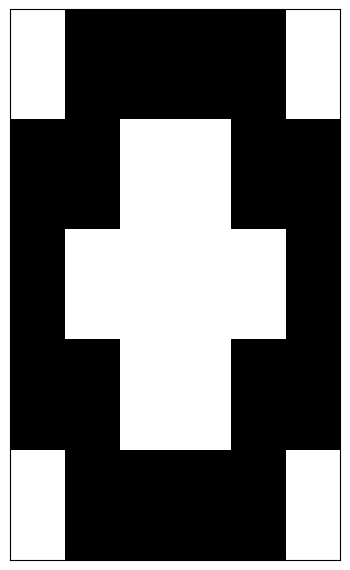

pattern 1


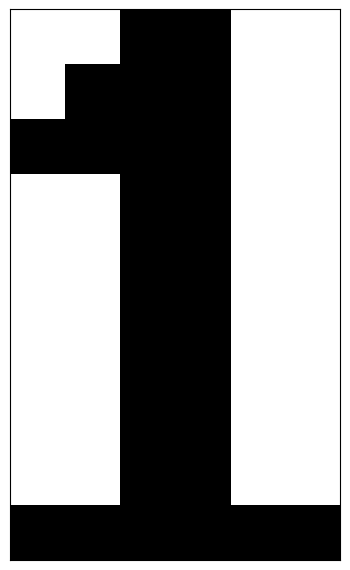

pattern 2


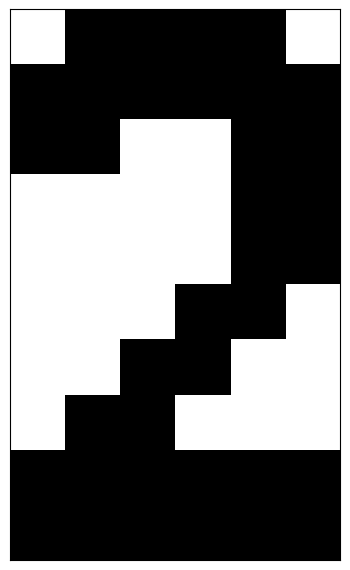

***** THE OSCILLATORY MODEL SIMULATION *****
The input pattern


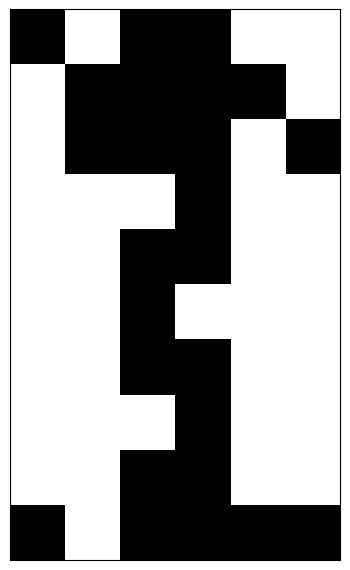

***** INITIALIZATION OF THE NETWORK *****
initialization t= 0
initialization t= 2.5
initialization t= 5.0
initialization t= 7.5
initialization t= 10.0
initialization t= 12.5
initialization t= 15.0
initialization t= 17.5
initialization t= 20.0


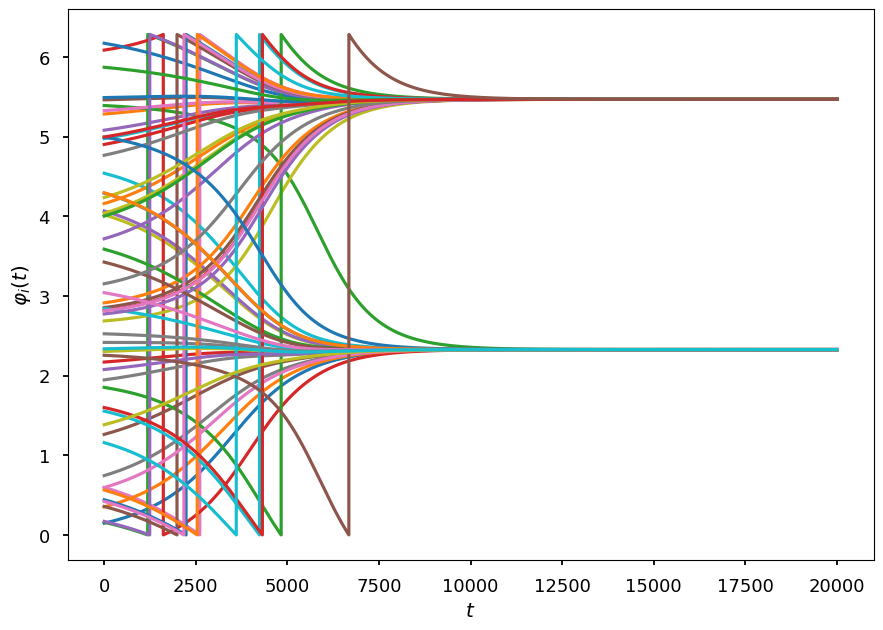

***** PATTERN RECOGNITION *****
recognition t= 0


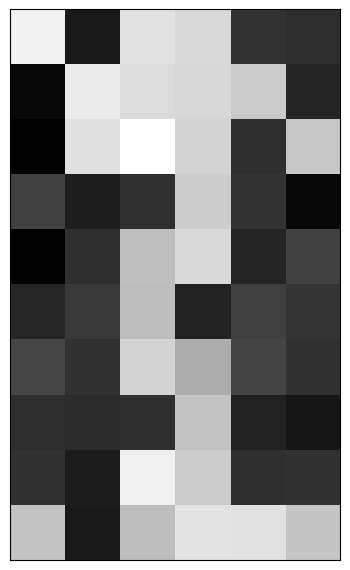

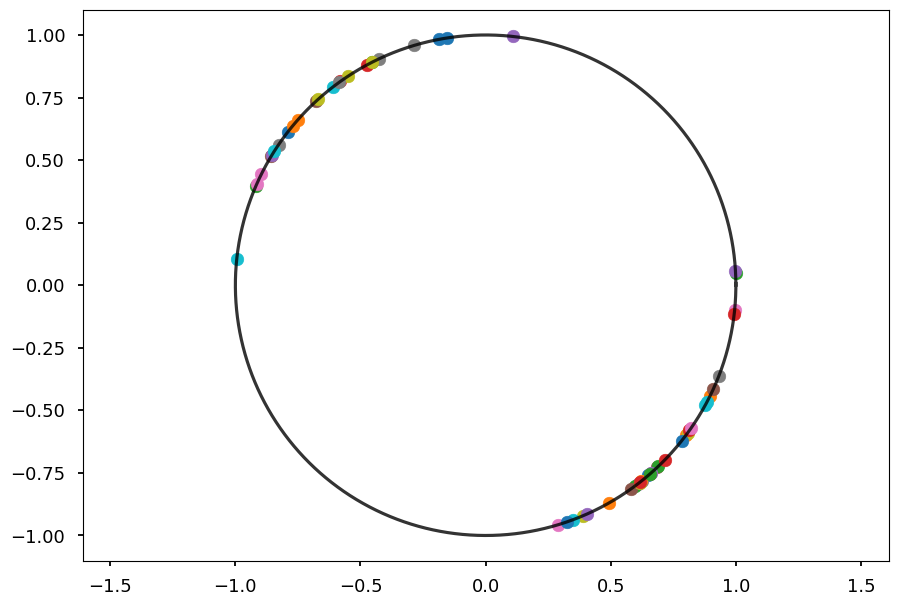

recognition t= 2.5


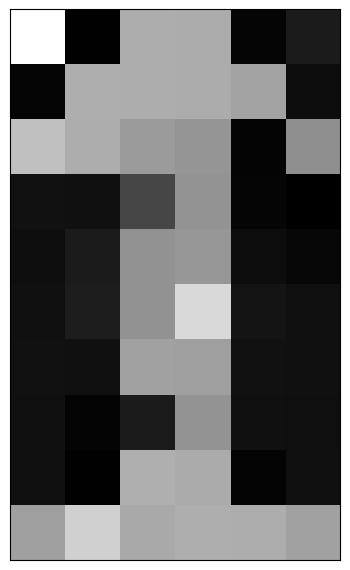

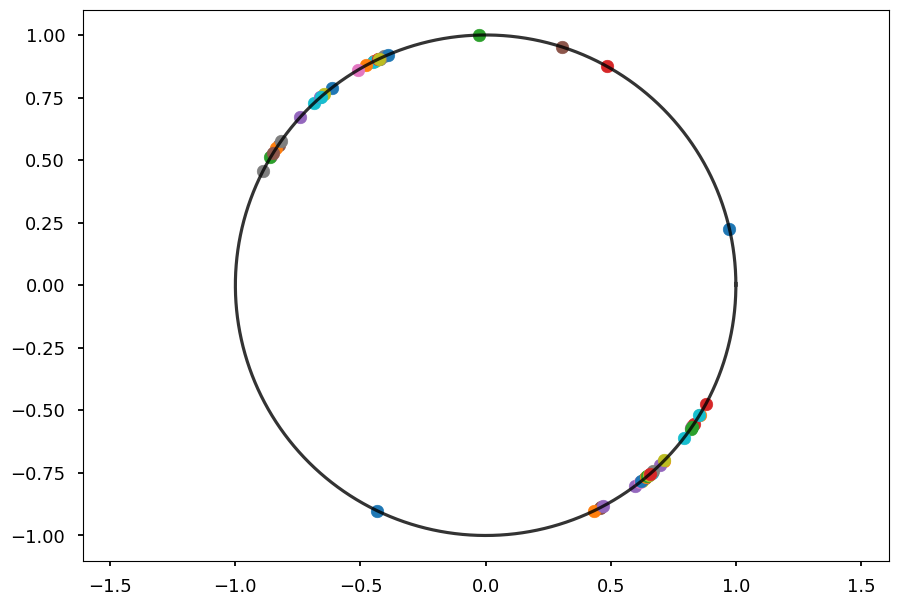

recognition t= 5.0


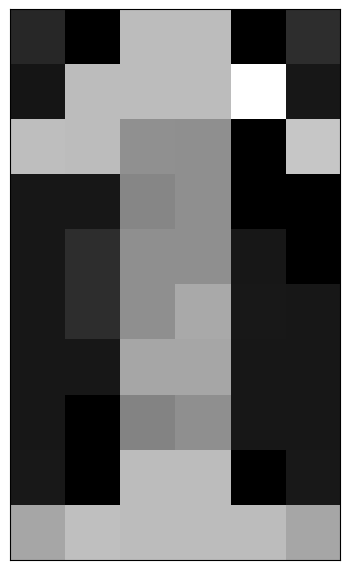

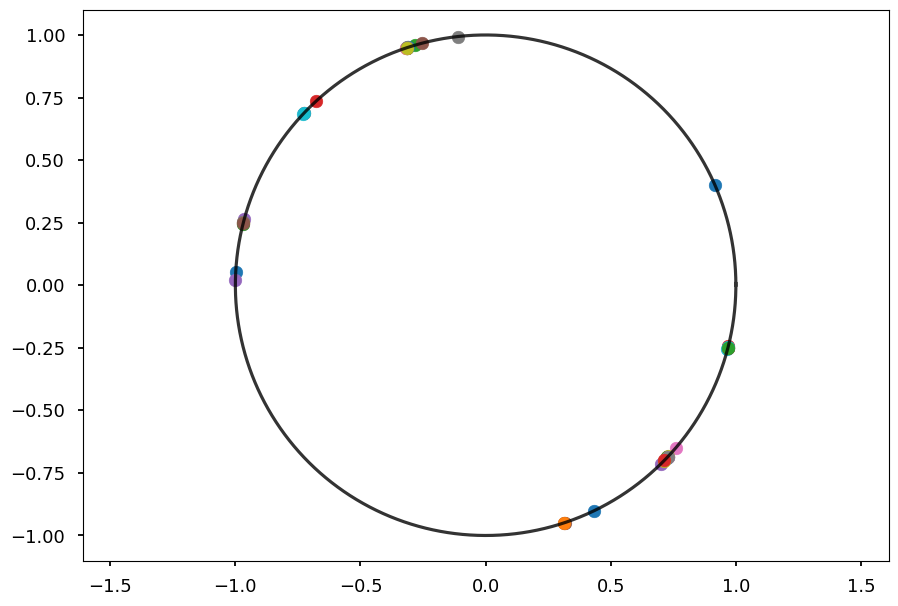

recognition t= 7.5


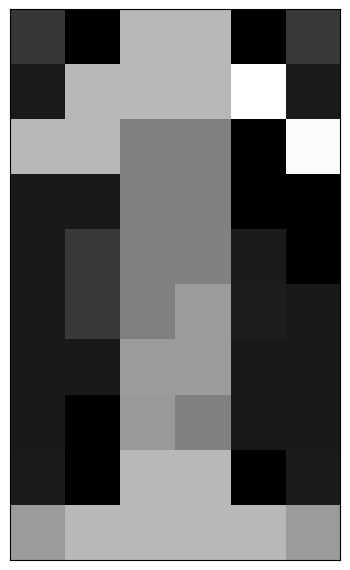

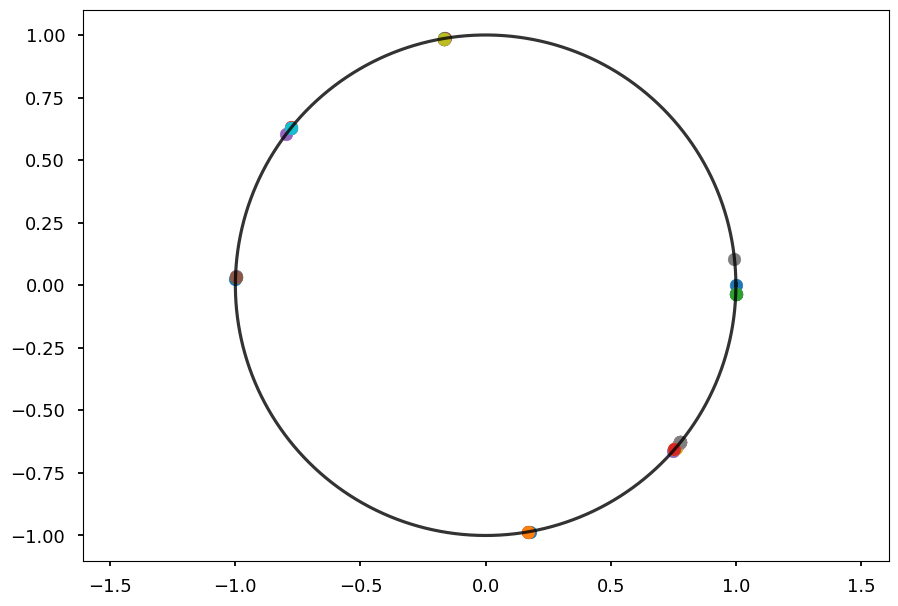

recognition t= 10.0


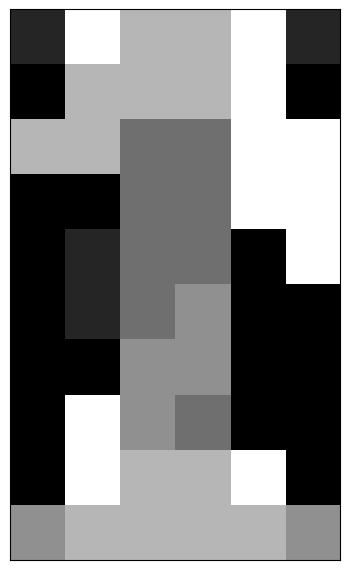

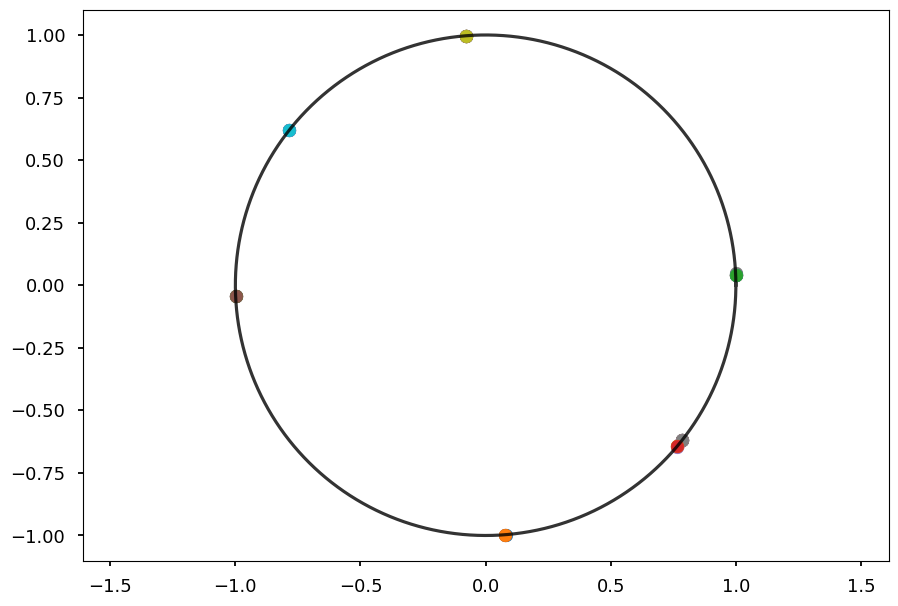

recognition t= 12.5


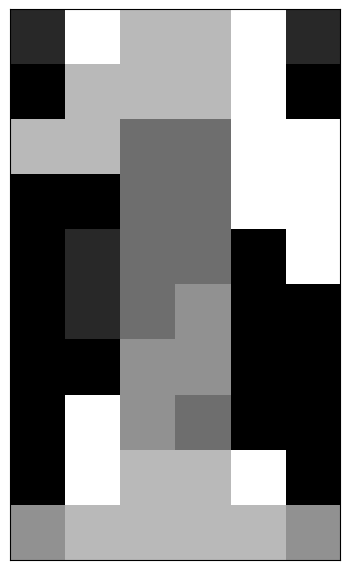

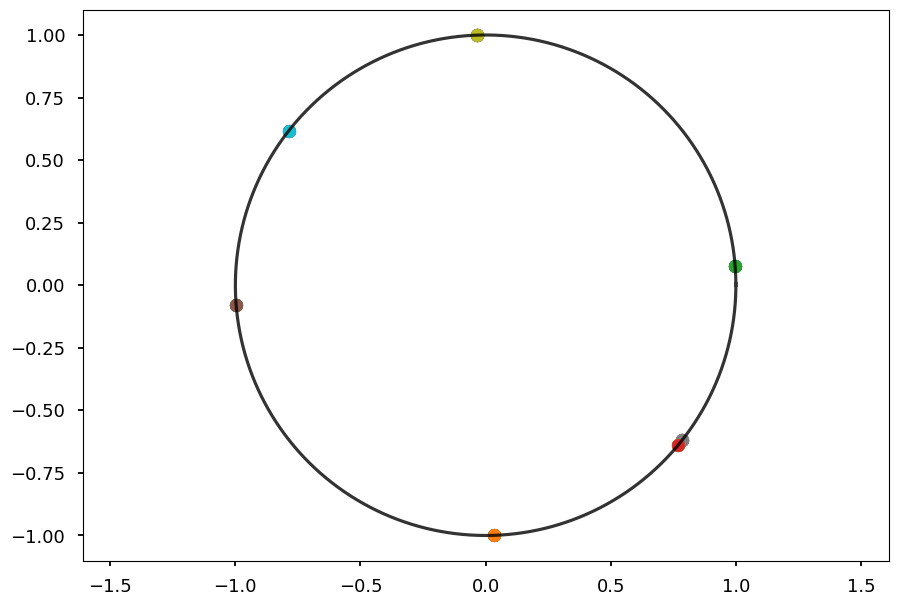

recognition t= 15.0


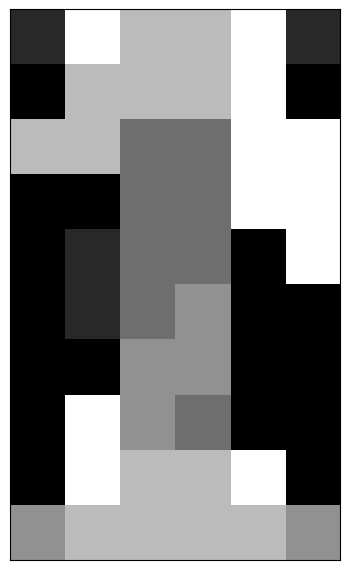

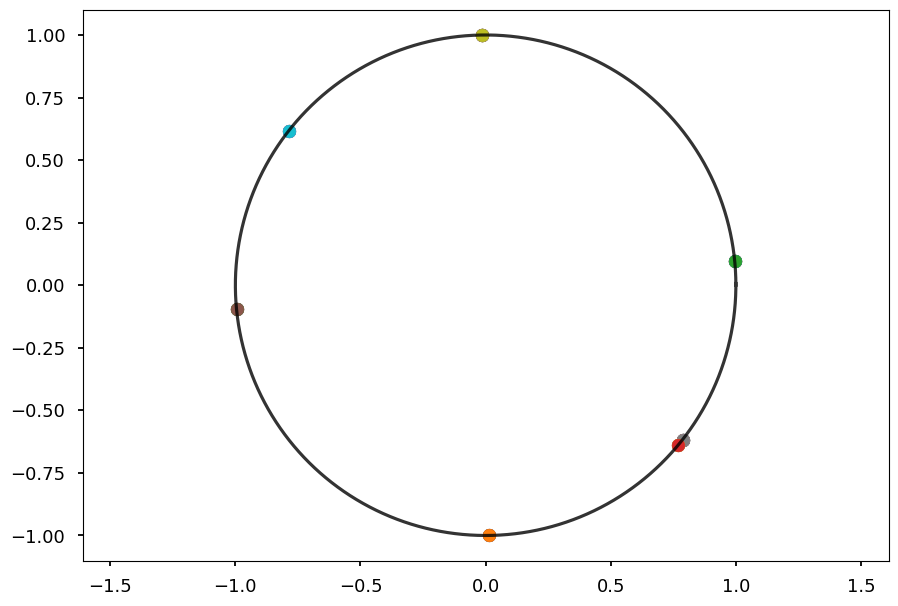

recognition t= 17.5


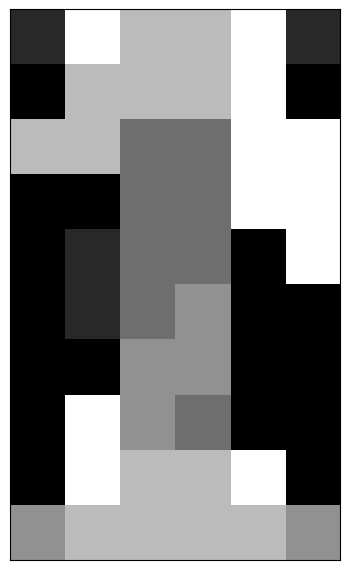

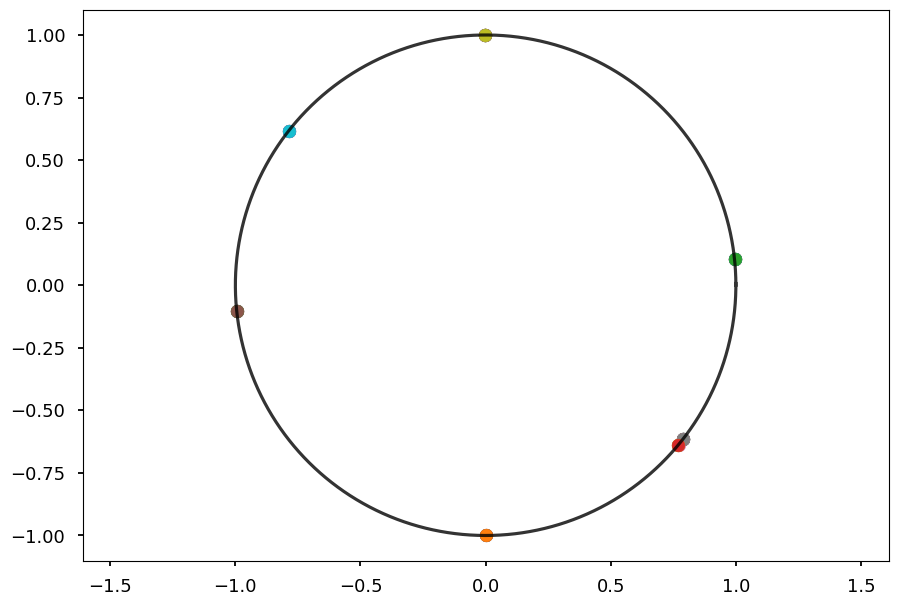

recognition t= 20.0


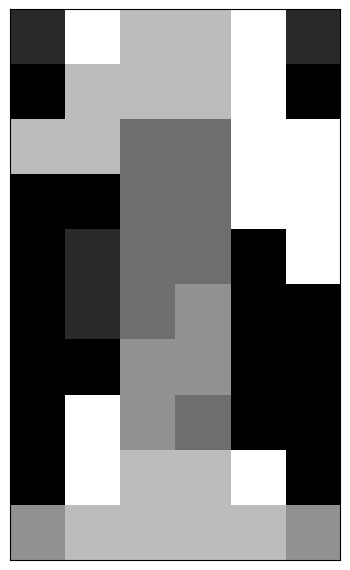

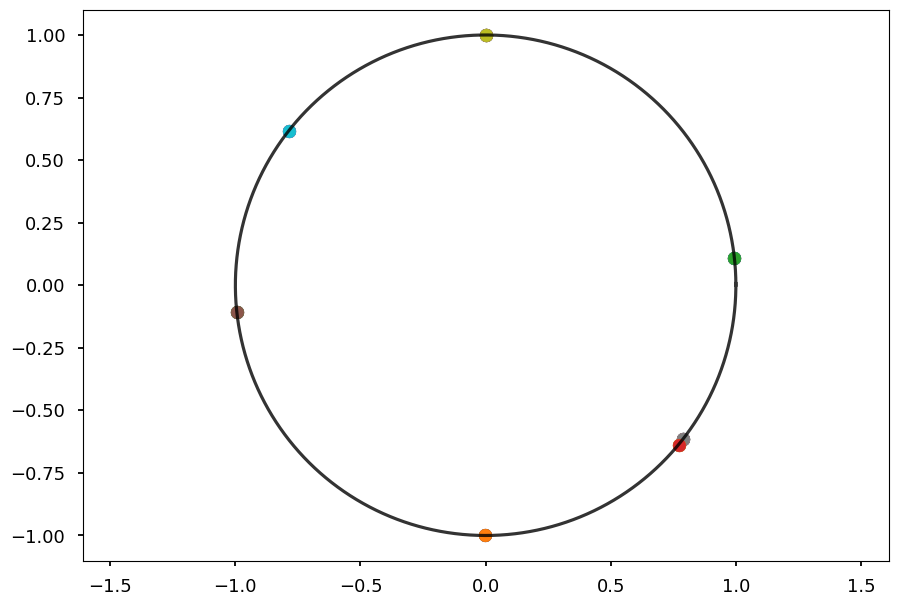

final solution


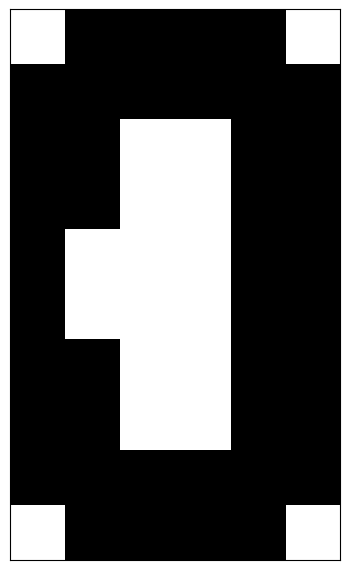

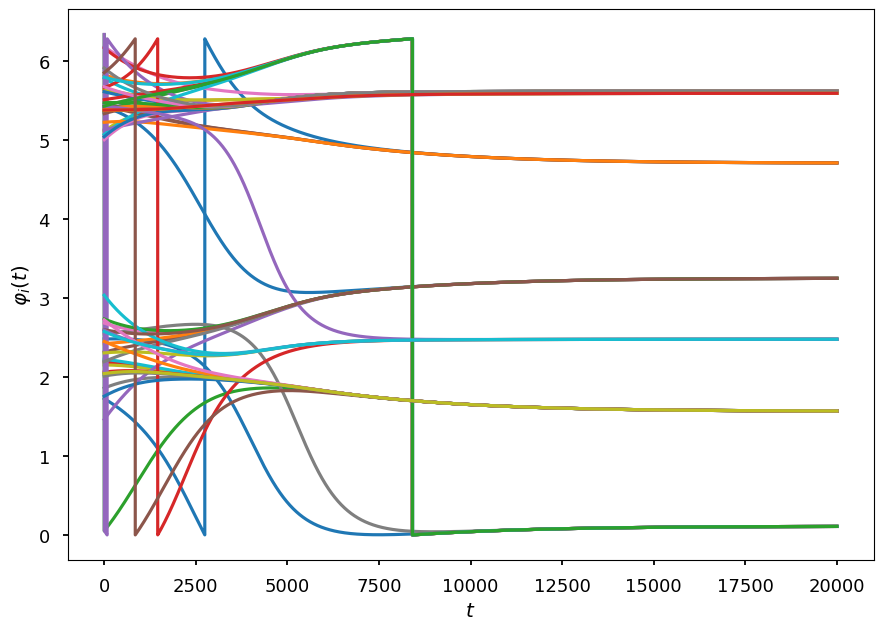

In [7]:
model = OscillatoryNeurocomputer(dt=0.01)
model.show_patterns()
model.simulation()

***** MEMORIZED PATTERNS *****
pattern 0


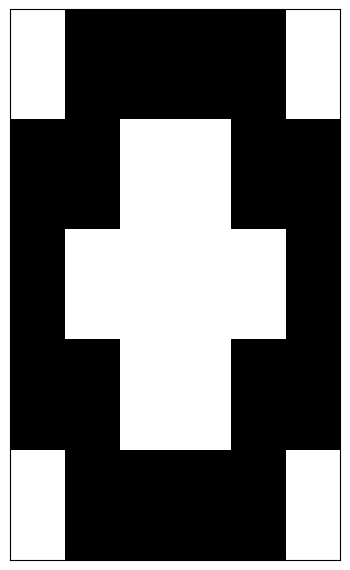

pattern 1


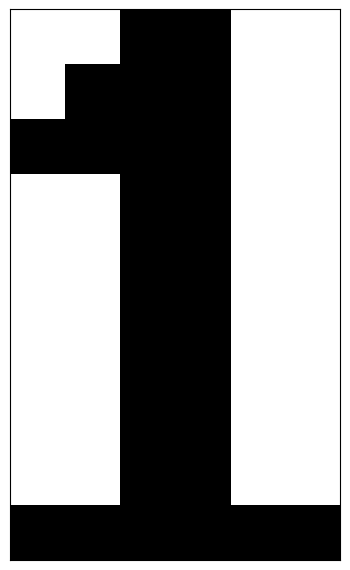

pattern 2


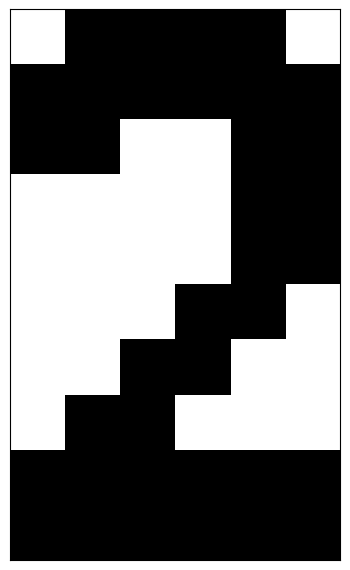

***** THE OSCILLATORY MODEL SIMULATION *****
The input pattern


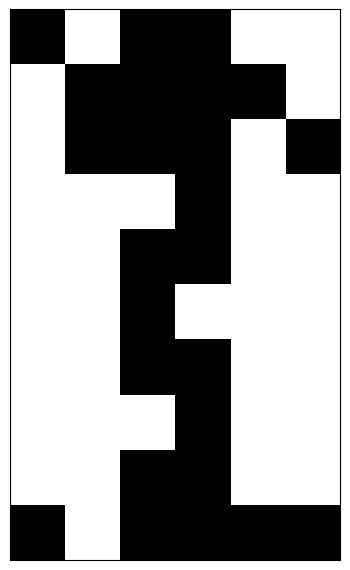

***** INITIALIZATION OF THE NETWORK *****
initialization t= 0
initialization t= 2.5
initialization t= 5.0
initialization t= 7.5
initialization t= 10.0
initialization t= 12.5
initialization t= 15.0
initialization t= 17.5
initialization t= 20.0


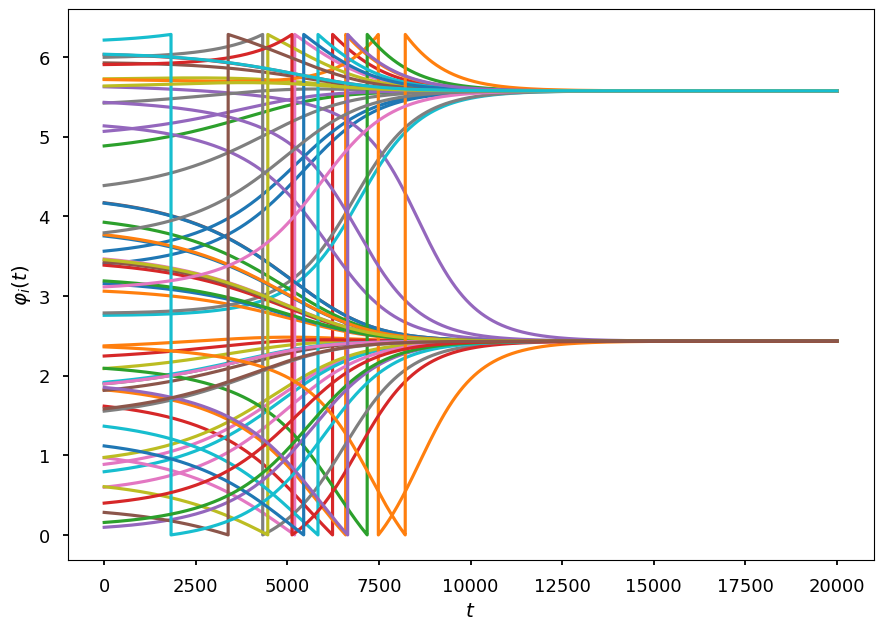

***** PATTERN RECOGNITION *****
recognition t= 0


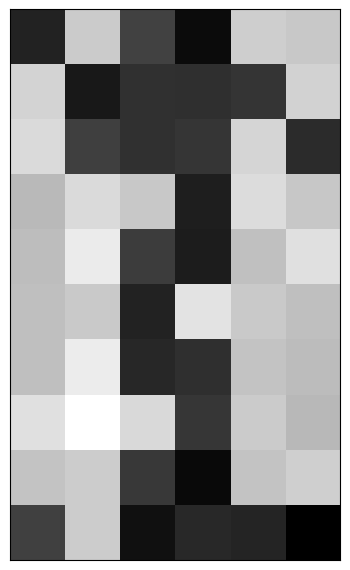

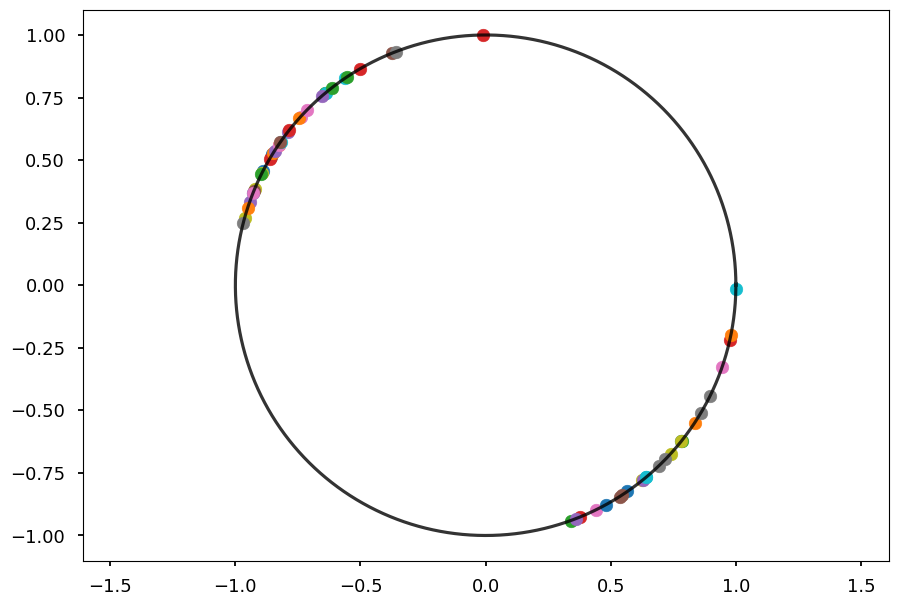

recognition t= 2.5


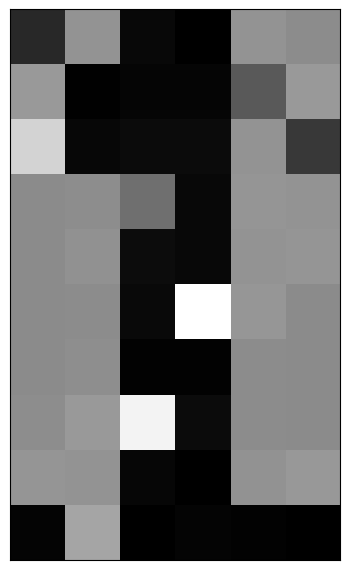

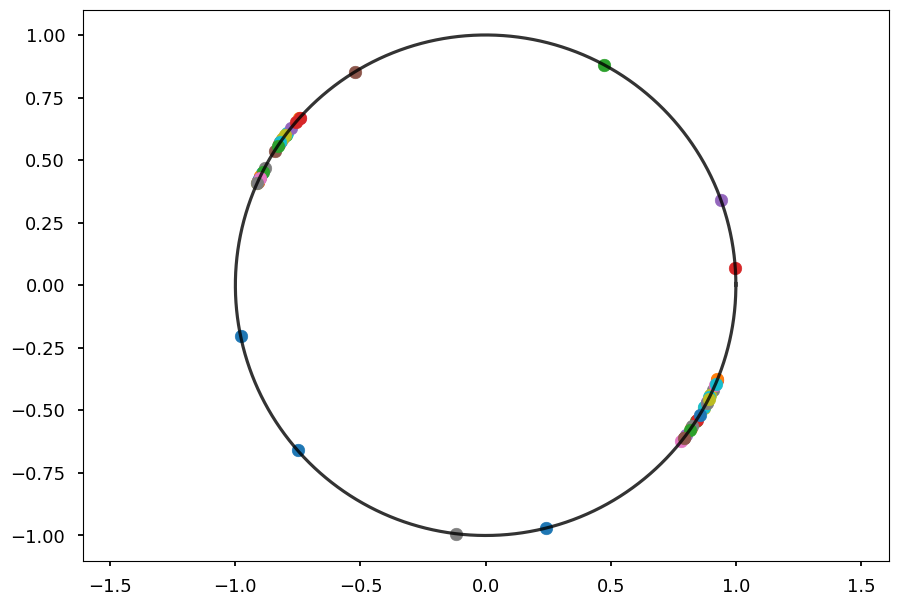

recognition t= 5.0


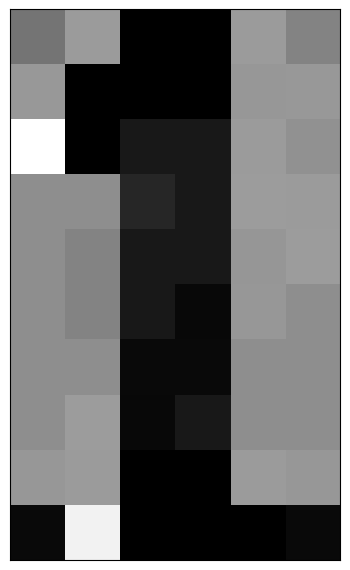

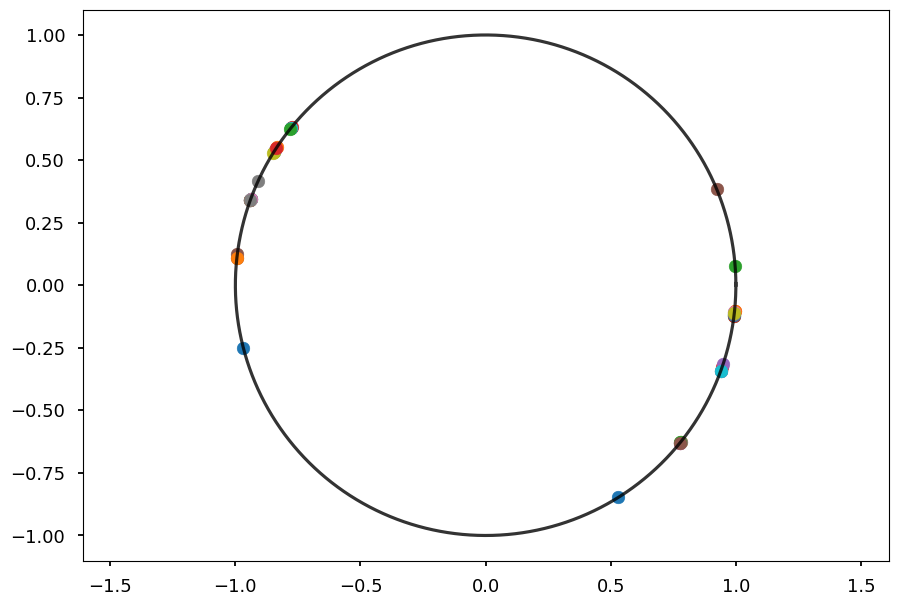

recognition t= 7.5


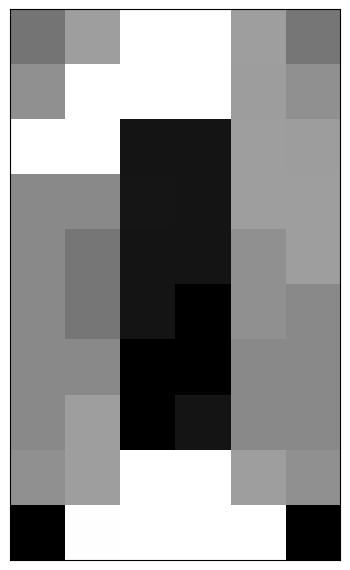

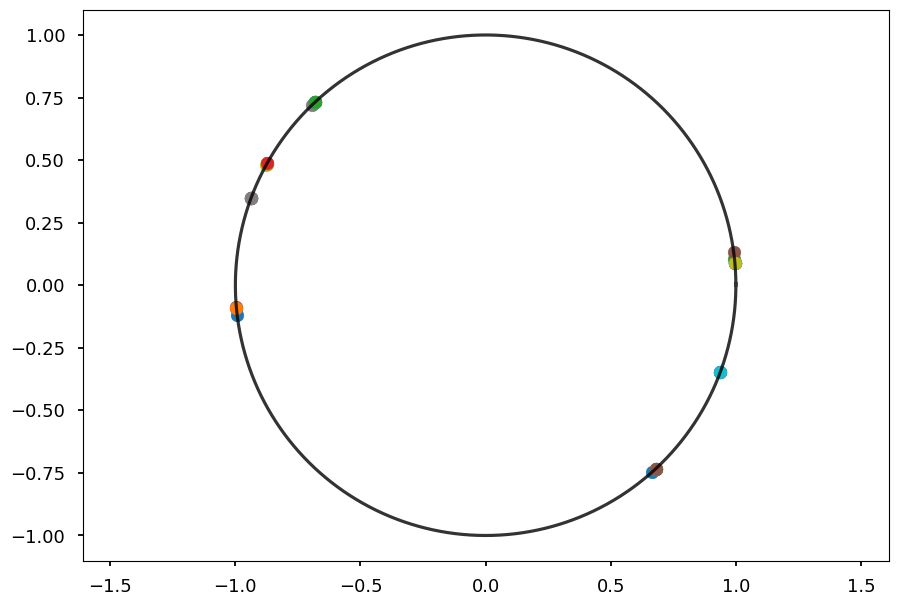

recognition t= 10.0


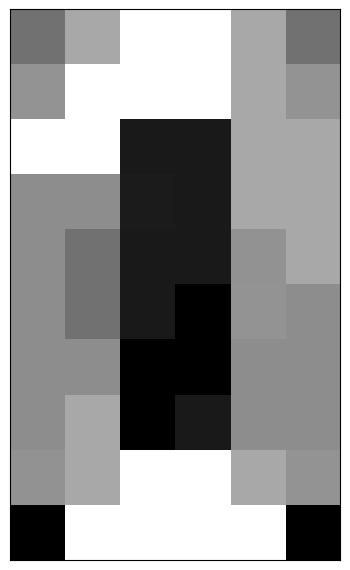

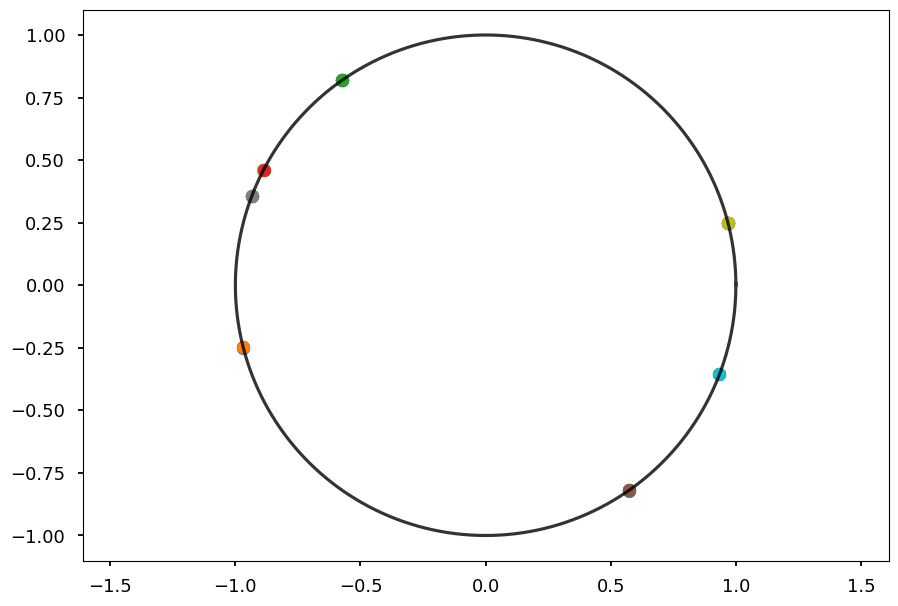

recognition t= 12.5


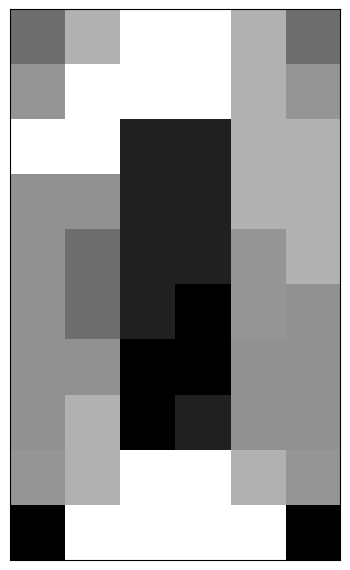

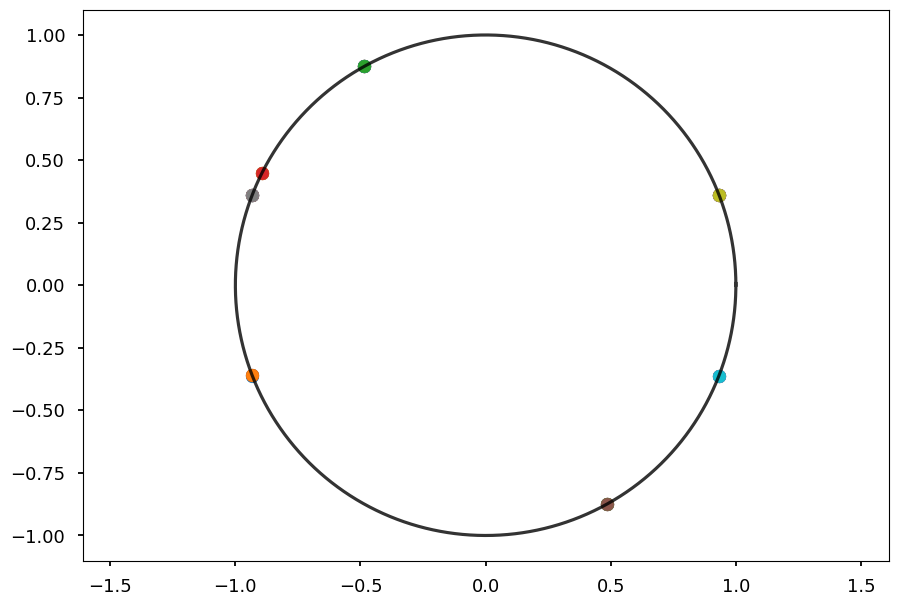

recognition t= 15.0


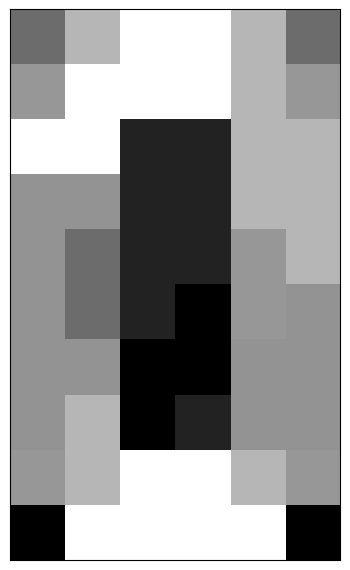

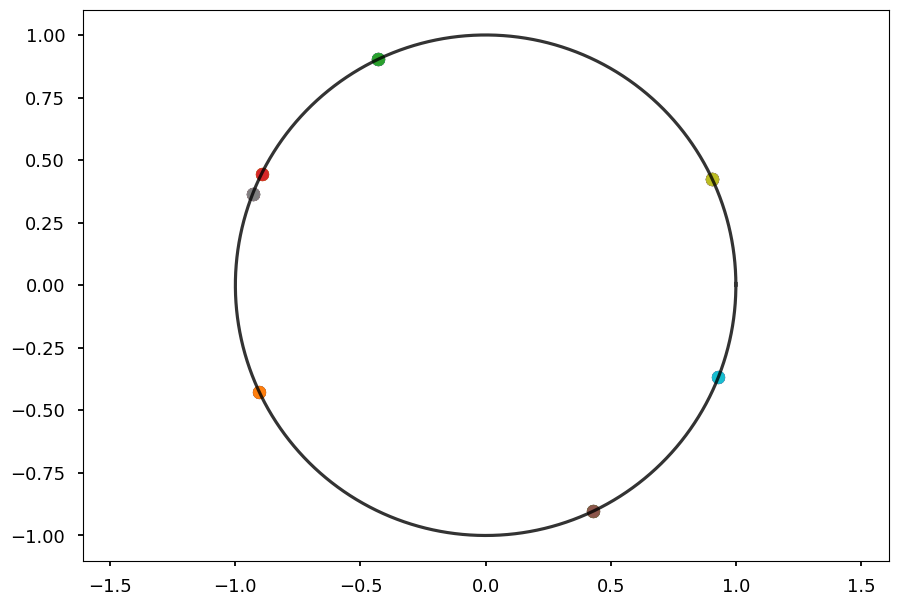

recognition t= 17.5


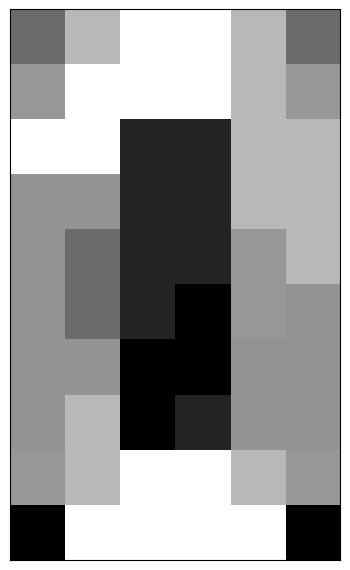

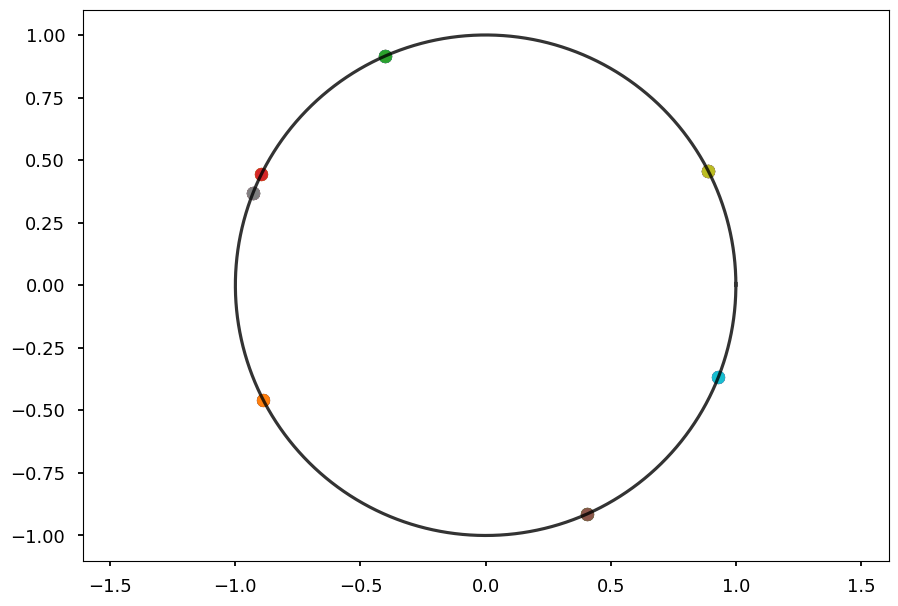

recognition t= 20.0


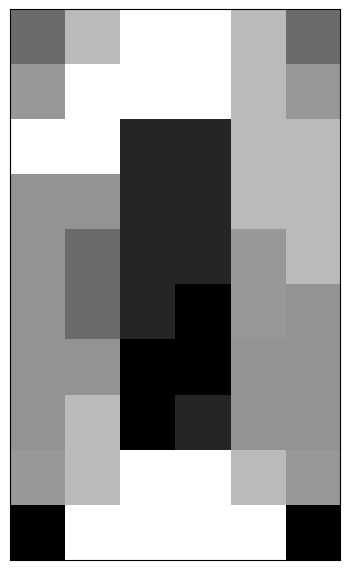

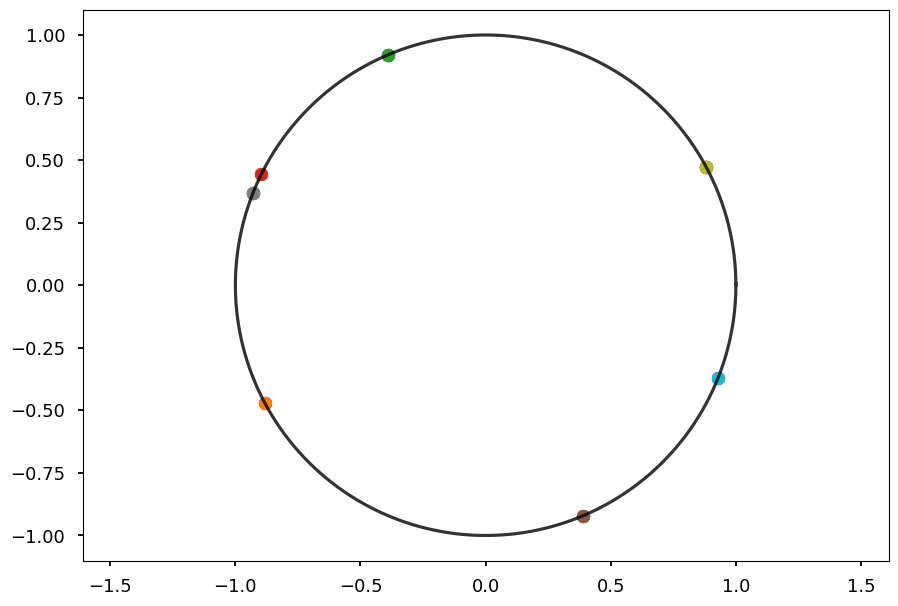

final solution


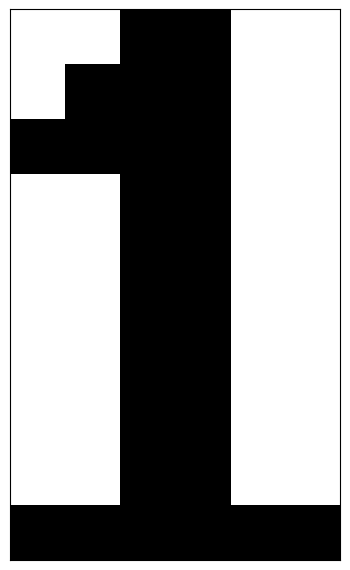

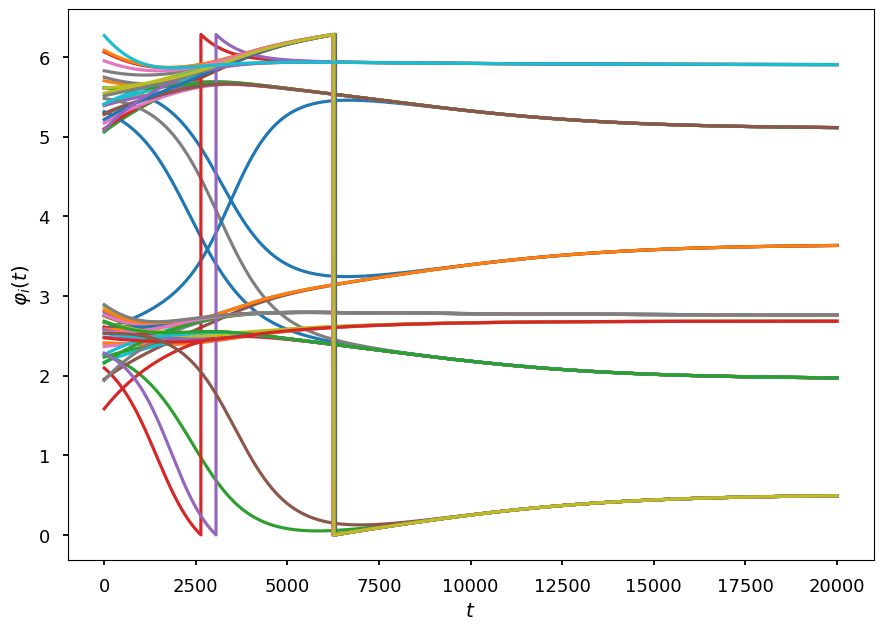

In [5]:
model = OscillatoryNeurocomputer(dt=0.001)
model.show_patterns()
model.simulation()